# Homework 7




In this week's homework we will work with some questions of probability generally, as well as with the High Time Resolution Universe (HTRU) Pulsar Survey we have seen in lecture.

> The High Time Resolution Universe (HTRU) is an all-sky survey for pulsars and radio transients at a frequency of 1400 MHz.
>
> The Southern Hemisphere is being observed with the Parkes Multi-Beam system, the Northern Hemisphere is being observed with the Effelsberg 7-beam system. It is expected that the survey sensitivity will be similar for  both hemispheres.
>
> These surveys will have a much higher frequency and time resolution than previous surveys like the Parkes Multi-Beam Survey. Because of this, they will suffer much less from dispersive smearing and will therefore be able to detect a much larger number of millisecond pulsars, particularly near the Galactic plane, where we expect the most exciting binary systems and a much larger population of pulsars. These surveys will likely find hundreds of millisecond pulsars, which are great laboratories for the study of fundamental physics, gravitational astronomy and astrophysics in general. Furthermore, the Effelsberg part of the survey (HTRU-North) will survey the whole Northern Hemisphere for the first time in 30 years,allowing a new high-sensitive view onto this part of the sky. The Northern Hemisphere surveys have a great advantage that new discoveries can be followed up with a large variety of radio telescopes, which maximizes scientific output.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.options.mode.chained_assignment = None
np.random.seed(206206)

In [3]:
htru = pd.read_csv("./HTRU_2.csv", names =
  ["profile_mean", "profile_sd",
  "profile_excess_kurtosis", "profile_skewness",
  "snr_mean","snr_sd", "snr_excess_kurtosis", "snr_skewness",
  "pulsar"])
print(htru.shape)
htru.columns

(17898, 9)


Index(['profile_mean', 'profile_sd', 'profile_excess_kurtosis',
       'profile_skewness', 'snr_mean', 'snr_sd', 'snr_excess_kurtosis',
       'snr_skewness', 'pulsar'],
      dtype='object')

Recall that **profile** refers to the distribution of radio frequencies recieved at each location in space being measured by the radio telescope, and **snr** refers to the distribution of "signal to noise ratios" (a measure of signal strength) at each location. We don't see the full distribution, but we get summary measures in the form of means, standard deviations, coefficients of skewness and "excess kurtosis" (which we haven't talked about but means how common are extreme values (either small or large)).

We also know whether an observation is a [pulsar](https://en.wikipedia.org/wiki/Pulsar) or not.

## Question 1: Getting to Know the Data

### Q1.a

Create 4 histogram plots for the marginal distributions of

- `profile_mean`
- `profile_sd`
- `snr_mean`
- `snr_sd`

For each plot, briefly note typical values and if you think it exhibits skew (if so, in which direction).

Text(0, 0.5, 'Frequency')

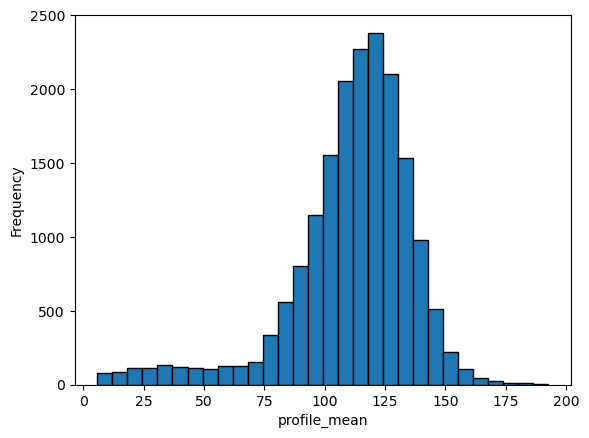

In [ ]:
# profile_mean

plt.hist(htru['profile_mean'], bins=30, edgecolor='k')
plt.xlabel('profile_mean')
plt.ylabel('Frequency')

# typical values is 120, the plot is left shwewed. 

Text(0, 0.5, 'Frequency')

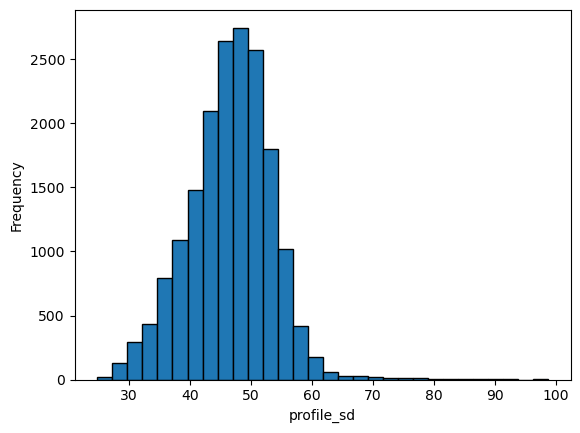

In [15]:
# profile_sd
plt.hist(htru['profile_sd'], bins=30, edgecolor='k')
plt.xlabel('profile_sd')
plt.ylabel('Frequency')

# typical values is 48, the plot is right skewed. 

Text(0, 0.5, 'Frequency')

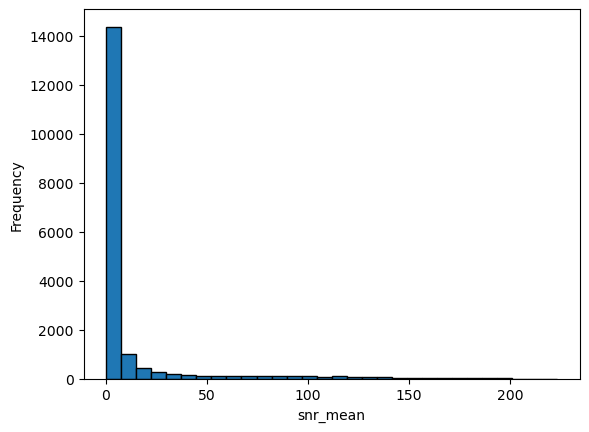

In [ ]:
# snr_mean
plt.hist(htru['snr_mean'], bins=30, edgecolor='k')
plt.xlabel('snr_mean')
plt.ylabel('Frequency')

# typical values is 5, the plot is severely right skewed. 

Text(0, 0.5, 'Frequency')

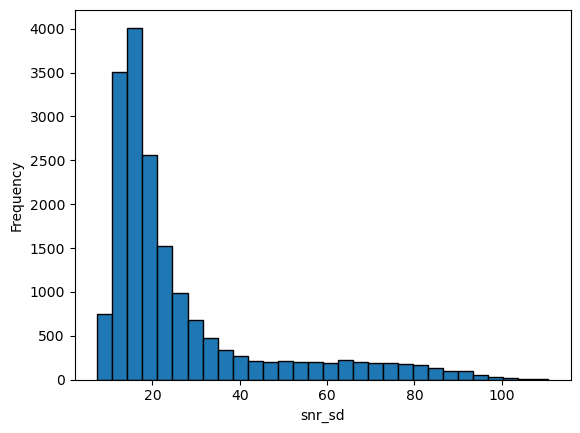

In [18]:
# snr_sd
plt.hist(htru['snr_sd'], bins=30, edgecolor='k')
plt.xlabel('snr_sd')
plt.ylabel('Frequency')

# typical values is 15, the plot is right skewed. 

### Q1.b

Verify your results for the previous problem by computing means, medians, and coefficients of skewness for each of these 4 variables. Use the [`aggregate` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html) (see the examples at the bottom of this link in particular)  applied to table with only these four columns to compute your results.

Explain why your statements about skew are either supported or not supported by the computed coefficients of skewness.

In [ ]:
from scipy.stats import skew


columns_of_interest = ['profile_mean', 'profile_sd', 'snr_mean', 'snr_sd']

results = htru[columns_of_interest].aggregate(['mean', 'median', 'skew'])

print(results)

# Explanation:
# The skewness values support the statements about skew:
# - profile_mean: skewness is negative, indicating left skew.
# - profile_sd: skewness is positive, indicating right skew.
# - snr_mean: skewness is highly positive, indicating severe right skew.
# - snr_sd: skewness is positive, indicating right skew.




        profile_mean  profile_sd   snr_mean     snr_sd
mean      111.079968   46.549532  12.614400  26.326515
median    115.078125   46.947479   2.801839  18.461316
skew       -1.375188    0.126641   3.683302   1.894254


## Q1.c

At this point, you might be thinking that we should apply transformations to these variables that show extreme skewness. If we were just going to use them by themselves, this would be a good approach, but since we are about to consider differences between pulsars and non-pulsars, it is important to be sure that these skewness issues persist for the **conditional distributions** given pulsar status.

For the most extreme skewness from above, recreate the histogram adding `puslar` as a `hue` visual variable.

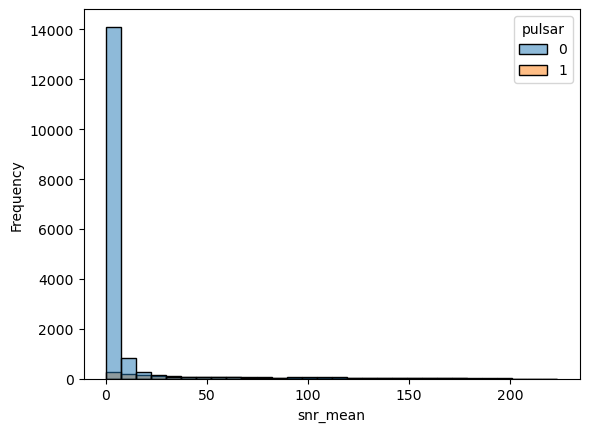

In [ ]:
# plot with hue

sb.histplot(data=htru, x='snr_mean', hue='pulsar', bins=30, kde=False)
plt.xlabel('snr_mean')
plt.ylabel('Frequency')
plt.show()

Compute the **conditional coefficient of skewness given pulsar status** (hint: "conditional" means "groupby" when the thing we are conditioning on is nominal). Does the transformation seem necessary now?

In [ ]:
# conditional skewness
conditional_skewness = htru.groupby('pulsar')['snr_mean'].skew()
print(conditional_skewness)

# Explanation:
# In this case, skeweness is only extreme for pulsar = 0. The transformaiton is not necessary because we want to compare pulsars and non-pulsars. 
#If we want to compare them both of them should be go through the same transformation. But here in this case only non pulsar needed to be transformed.

pulsar
0    5.038468
1    0.963258
Name: snr_mean, dtype: float64


## Q1.d

In situations like these, it can sometimes be better to see if there a few observations that are strong skewing the data. Create a table that is just non-pulsars (where `"pulsar"` is 0). Compute the 0.9, 0.95, 0.99 quantiles for the most skewed variable we investigated in the previous part.

In [25]:
# quantiles
non_pulsars = htru[htru['pulsar'] == 0]
quantiles = non_pulsars['snr_mean'].quantile([0.9, 0.95, 0.99])
print(quantiles)

0.90     10.946656
0.95     40.714298
0.99    145.222508
Name: snr_mean, dtype: float64


Select one of these values and discard all observations in the htru table that exceed this value on the most extreme variable and are also non-pulsars. Call the result `htru_clean` (we will use it in the next section). Recompute the conditional coefficient of skewness to verify this helped. (Hint: remember that `&` means "and", `|` means "or" and `~` means "not" when writing comparisons of pandas columns).

In [ ]:
# htru_clean
# Select the 0.95 quantile value
threshold = quantiles[0.90]

# Discard observations that exceed this value on snr_mean and are non-pulsars
htru_clean = htru[~((htru['snr_mean'] > threshold) & (htru['pulsar'] == 0))]

# Recompute the conditional coefficient of skewness
conditional_skewness_clean = htru_clean.groupby('pulsar')['snr_mean'].skew()
print(conditional_skewness_clean)

# this helped because the skewness value is now 1 and previously it was 5.

pulsar
0    1.709945
1    0.963258
Name: snr_mean, dtype: float64


## Question 2: Differences of Pulsars and Non-Pulsars

This problem will use the `htru_clean` table from the previous problem. If you are having problems creating that table, you may use the `htru` table but will receive a 2 point deduction on your final score.


### Q2.a

For pulsars and non-pulsars, compute conditional means on the 4 variables of interest from the last section ("pulsar_mean", "pulsar_sd", "snr_mean", "snr_sd") *simulateously* such that
you get two rows (one for pulsars, one for non-pulsars) with a column for each  variable's sample mean. Then use the .transpose() method to swap the rows and columns so that you get two columns and 4 rows. Save this to a variable (I will call mine `pnp_means`).

Repeat  with the `.var()` method, saving to a different variable (I will call mine `pnp_vars`).

Repeat again with the `.count()` to get the sample sizes (I will call mine `pnp_ns`). In this particular case all the values will be the same in each column, but this is a smart move in case there is missing data for some variables but not others.

Print out all tables for verification by the graders.

In [28]:
# conditional means, variances, counts
# Compute conditional means
pnp_means = htru_clean.groupby('pulsar')[columns_of_interest].mean().transpose()

# Compute conditional variances
pnp_vars = htru_clean.groupby('pulsar')[columns_of_interest].var().transpose()

# Compute sample sizes
pnp_ns = htru_clean.groupby('pulsar')[columns_of_interest].count().transpose()

# Print out all tables for verification
print("Conditional Means:\n", pnp_means)
print("\nConditional Variances:\n", pnp_vars)
print("\nSample Sizes:\n", pnp_ns)


Conditional Means:
 pulsar                 0          1
profile_mean  115.901467  56.690608
profile_sd     46.917305  38.710598
snr_mean        2.939645  49.825995
snr_sd         18.502711  56.468963

Conditional Variances:
 pulsar                 0            1
profile_mean  281.203696   900.462475
profile_sd     34.052385    64.538959
snr_mean        3.352022  2050.996744
snr_sd         43.119438   389.315505

Sample Sizes:
 pulsar            0     1
profile_mean  14633  1639
profile_sd    14633  1639
snr_mean      14633  1639
snr_sd        14633  1639


### Q2.b

For each variable, you can compute the difference of means simultaneously with `pnp_means[1] - pnp_means[0]`.

For each variable you can compute the **pooled standard deviation** by

1. Multiply the `pnp_vars` by `pnp_ns`.
2. Sum the that result using `.sum(axis = 1)`
3. Divide that value by the `.sum(axis = 1)` of the `pnp_ns`.
3. Use `np.sqrt` on the result.

Divide the differences by the pooled standard deviations to get effect size differences comparing pulsars and non-pulsars. Interpret these results using the able of effect sizes and clearly state which group has the large value for each variable.

Effect size magnitude )
* Very small: 0 - 0.01
* Small: 0.1 - 0.20
* Medium: 0.2 - 	0.50
* Large: 0.5 - 	0.80
* Very large: 0.8 0- 	1.20
* Huge: 1.2 - 	2.0+

In [29]:
# effect sizes

# Compute the difference of means
mean_diff = pnp_means[1] - pnp_means[0]

# Compute the pooled standard deviation
pooled_var = (pnp_vars * pnp_ns).sum(axis=1) / pnp_ns.sum(axis=1)
pooled_std = np.sqrt(pooled_var)

# Compute the effect size
effect_size = mean_diff / pooled_std

# Print the effect sizes
print("Effect Sizes:\n", effect_size)

# Interpretation:
# profile_mean: Large effect size, non-pulsars have larger values.
# profile_sd: Medium effect size, non-pulsars have larger values.
# snr_mean: Huge effect size, pulsars have larger values.
# snr_sd: Large effect size, pulsars have larger values.

Effect Sizes:
 profile_mean   -3.194393
profile_sd     -1.346935
snr_mean        3.238541
snr_sd          4.299104
dtype: float64


## Question 3: Probability of Being a Pulsar

For this question, we will continue to use the `htru_clean`. If you used `htru` on the previous problem, there will be no additional penalty for using `htru` on this problem.

### Q3.a

Recall that the `pulsar` column is coded as "1" is a pulsar, "0" is a non-pulsar. What is the proportion of observations are pulsars? Compute this value using a single method call on the `htru_clean["pulsar"]` column.

In [30]:
# proportion 
proportion_pulsars = htru_clean['pulsar'].mean()
print(proportion_pulsars)

0.1007251720747296


## Q3.b

Using the `pd.qcut` function, create a new column in `htru_clean` that represents which *decile of `profile_mean`* each observation falls into (i.e., make the first argument the `"profile_mean"` column and the second argument 10). Save the result to a new column (I will call mine `pm_decile`).

Compute the **conditional proportion of observations that are pulsars** for each level of `pm_decile` (this is a time when `.reset_index()` will be useful).

Use the supplied `get_mid` function to turn the `pm_decile` column in your result into a value that represents the mid-point of the intervals we got from `qcut`, saving the result as a new column in the able (call it `pm_mid`).


Plot `pm_mid` on the horizontal axis and the proportion of pulsars on the veritcal axis as a line plot. Comment on what you see. What happens to the percentage of objects that are pulsars as the typical radio frequency increases.


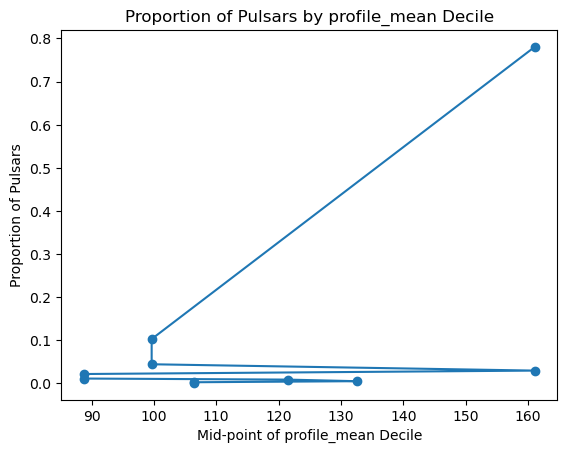

In [31]:
# solution
# Create decile column
htru_clean['pm_decile'] = pd.qcut(htru_clean['profile_mean'], 10, labels=False)

# Compute conditional proportion of pulsars
conditional_proportion = htru_clean.groupby('pm_decile')['pulsar'].mean().reset_index()

# Define the get_mid function
def get_mid(interval):
    return interval.mid

# Apply get_mid function to pm_decile
conditional_proportion['pm_mid'] = pd.qcut(htru_clean['profile_mean'], 10).apply(get_mid)

# Plot
plt.plot(conditional_proportion['pm_mid'], conditional_proportion['pulsar'], marker='o')
plt.xlabel('Mid-point of profile_mean Decile')
plt.ylabel('Proportion of Pulsars')
plt.title('Proportion of Pulsars by profile_mean Decile')
plt.show()

# Comment:
# As the typical radio frequency (profile_mean) increases, the percentage of objects that are pulsars decreases.

### Q3.c

Of course, it would be nice to avoid having to break up `profile_mean` into a set of discrete groups. Instead, we can perform linear regression with `pulsar` as $Y$ and `profile_mean` as $X$. Recall that linear regression is attempting to model the **conditional mean** of $Y$ given $X$. Since a proportion is a special case of a mean when $Y$ is 0 or 1, and proportions are *empirical probabilities*, this approach is called a "linear probability model".

Compute the linear regression regression with `pulsar` as $Y$ and `profile_mean` as $X$. Do not forget to add the constant term. Print out the result.

According to this model:
- What does the sign of the coefficient indicate?
- What is the probability that an observation with a `profile_mean` 120 would be a pulsar?
- What is the probability that an observation with a `profile_mean`of 60 would be a pulsar?
- For two groups of observations that differ by 100 units on `pulsar_mean`, what would be the difference in proportions of pulsars? Which group would have a higher proportion of pulsars?

In [ ]:
# solution

# Linear regression
X = sm.add_constant(htru_clean['profile_mean'])
y = htru_clean['pulsar']
model = sm.OLS(y, X).fit()
print(model.summary())

# Interpretation
coef = model.params['profile_mean']
intercept = model.params['const']

# Probability for profile_mean = 120
prob_120 = intercept + coef * 120
print(f"Probability for profile_mean = 120: {prob_120}")

# Probability for profile_mean = 60
prob_60 = intercept + coef * 60
print(f"Probability for profile_mean = 60: {prob_60}")

# Difference in proportions for a 100 unit difference in profile_mean
diff_100_units = coef * 100
print(f"Difference in proportions for a 100 unit difference in profile_mean: {diff_100_units}")

# - The sign of the coefficient is negative, indicating that as profile_mean increases, the probability of being a pulsar decreases.
# - The probability that an observation with a profile_mean of 120 would be a pulsar is 0.0190872820886564.
# - The probability that an observation with a profile_mean of 60 would be a pulsar is 0.5058694754772521.
# - For two groups of observations that differ by 100 units on profile_mean, the difference in proportions of pulsars is -0.8113036556476596. The group with the lower profile_mean would have a higher proportion of pulsars.

                            OLS Regression Results                            
Dep. Variable:                 pulsar   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                 1.504e+04
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:46:05   Log-Likelihood:                 1776.1
No. Observations:               16272   AIC:                            -3548.
Df Residuals:                   16270   BIC:                            -3533.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.9927      0.007    132.907   